In [1]:
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
print("Features:\n",data.columns)
dialects = ["Bandari", "Gilaki","Kurdish","Lori","Turkish"]
print("\nData Size:",data.shape)

Features:
 Index(['mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean',
       'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std',
       'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean',
       'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std',
       'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean',
       'mfcc13_std', 'zcr_mean', 'zcr_std', 'chroma_stft_mean',
       'chroma_stft_std', 'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_rolloff_mean', 'spectral_rolloff_std',
       'spectral_contrast_mean', 'spectral_contrast_std',
       'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'Dialect'],
      dtype='object')

Data Size: (1373, 39)


In [3]:
data[:5].style

,mfcc1_mean,mfcc1_std,mfcc2_mean,mfcc2_std,mfcc3_mean,mfcc3_std,mfcc4_mean,mfcc4_std,mfcc5_mean,mfcc5_std,mfcc6_mean,mfcc6_std,mfcc7_mean,mfcc7_std,mfcc8_mean,mfcc8_std,mfcc9_mean,mfcc9_std,mfcc10_mean,mfcc10_std,mfcc11_mean,mfcc11_std,mfcc12_mean,mfcc12_std,mfcc13_mean,mfcc13_std,zcr_mean,zcr_std,chroma_stft_mean,chroma_stft_std,spectral_centroid_mean,spectral_centroid_std,spectral_rolloff_mean,spectral_rolloff_std,spectral_contrast_mean,spectral_contrast_std,spectral_bandwidth_mean,spectral_bandwidth_std,Dialect
0,-0.505137,-0.474058,0.100753,-0.429672,-0.241534,-0.281024,-0.001253,-0.117957,0.056490,-0.055665,-0.115184,-0.304212,-0.380012,-0.128505,-0.244665,-0.129142,0.185457,-0.213791,0.004735,0.077291,0.500020,-0.026656,0.177149,-0.060607,-0.096907,0.076898,-0.005569,0.163974,-0.300430,0.713358,0.386710,0.076369,0.508074,-0.100993,0.518135,-0.206736,0.637067,-0.235838,Bandari
1,-0.434982,-0.464445,0.035041,-0.521024,-0.292317,-0.351957,-0.127126,-0.155186,0.048122,-0.329348,-0.190154,-0.298883,-0.360532,-0.197584,-0.115632,-0.222554,0.183392,-0.285576,0.035526,-0.174817,0.288509,-0.119527,-0.113363,-0.162077,0.105766,-0.080410,0.048499,0.115952,-0.176615,0.699865,0.316720,0.016297,0.415346,-0.146298,0.495894,-0.103137,0.563902,-0.242518,Bandari
2,-0.221855,-0.387236,0.172282,-0.399367,-0.316947,-0.173469,0.144942,0.038502,0.236167,-0.159623,0.060040,-0.082799,-0.176133,-0.018062,0.109734,-0.095172,0.028479,-0.187989,0.127746,-0.020389,0.529654,-0.027414,0.171851,-0.036455,0.394936,0.083764,-0.526815,-0.246454,-0.131729,0.735733,0.067241,-0.086800,0.325638,-0.075875,0.387447,-0.239141,0.640344,-0.463891,Bandari
3,0.764953,-0.458751,-0.768641,-0.392733,-0.122061,-0.461448,0.927145,-0.063935,-0.770857,-0.142159,0.676869,-0.287009,0.140544,-0.261619,-0.598549,-0.225478,0.392761,-0.268507,0.257349,-0.181257,-0.912506,-0.233188,0.492536,-0.246766,-0.364638,-0.277112,-0.346975,-0.501088,-0.108690,0.669251,-0.373645,-0.711747,-0.353600,-0.813107,0.717200,0.427786,-0.343906,-0.847681,Bandari
4,-0.297846,-0.351115,0.193309,-0.380172,-0.148178,-0.145566,0.166191,0.216275,0.226891,-0.004351,0.242408,-0.114834,-0.017874,-0.072976,0.096345,0.195206,0.157777,-0.030968,0.092626,-0.112681,0.252611,-0.141438,0.136482,-0.161984,0.127394,-0.118966,-0.384688,0.416019,0.127634,0.723397,0.128464,0.093773,0.325490,-0.043644,0.352411,-0.142431,0.633614,-0.408904,Bandari


## PCA

<Figure size 432x288 with 0 Axes>

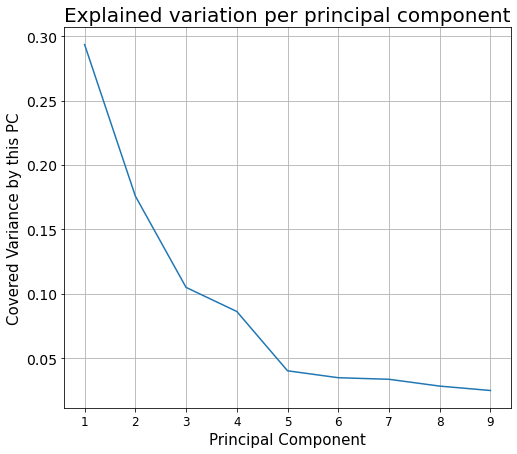

Explained variation per principal component for the first 9 PCs: [0.29348773 0.17592089 0.10500912 0.08633571 0.04028403 0.03492373
 0.03369619 0.02840874 0.02499137]

Covered Cumulative Variance: %82.306


In [4]:
from sklearn.decomposition import PCA

n_components = 9
data = pandas.read_csv('music_dataset3.csv',index_col=False)
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(data.iloc[:,:-1])

xs = np.array(range(1,n_components+1))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.grid()
plt.savefig('pca_variance')
plt.show()

print('Explained variation per principal component for the first 9 PCs: {}'.format(pca.explained_variance_ratio_[0:n_components]))
print('\nCovered Cumulative Variance: %'+str(round(pca.explained_variance_ratio_[0:n_components].sum()*100,3)))

<Figure size 432x288 with 0 Axes>

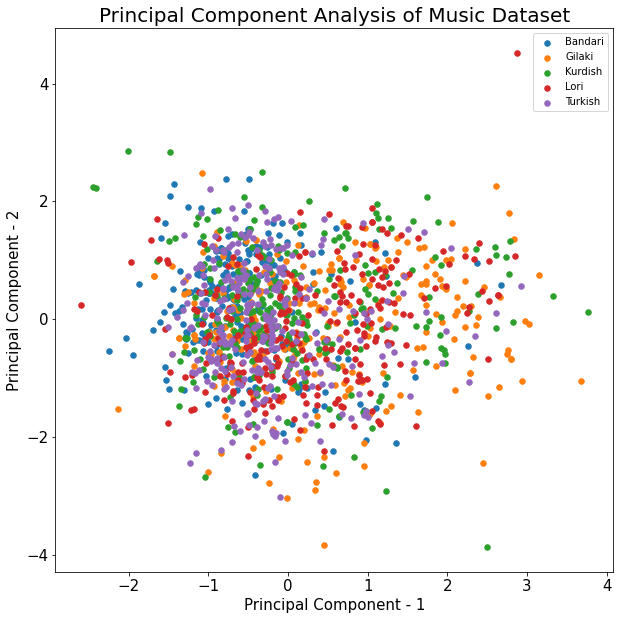

In [5]:
# Visualization
import pandas as pd

data = pandas.read_csv('music_dataset3.csv',index_col=False)
x = data.iloc[:,:-1].values
pca = PCA(n_components=2, whiten=True)
data_pca = pca.fit_transform(x)
principal_Df = pd.DataFrame(data = data_pca, columns = ['principal component 1', 'principal component 2'])

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Music Dataset",fontsize=20)
targets =  ["Bandari", "Gilaki", "Kurdish", "Lori", "Turkish"]
for target in targets:
    indicesToKeep = data['Dialect'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
                , principal_Df.loc[indicesToKeep, 'principal component 2'], s = 30)

plt.legend(targets,prop={'size': 10})

plt.savefig('two_pc')

## LDA

<Figure size 432x288 with 0 Axes>

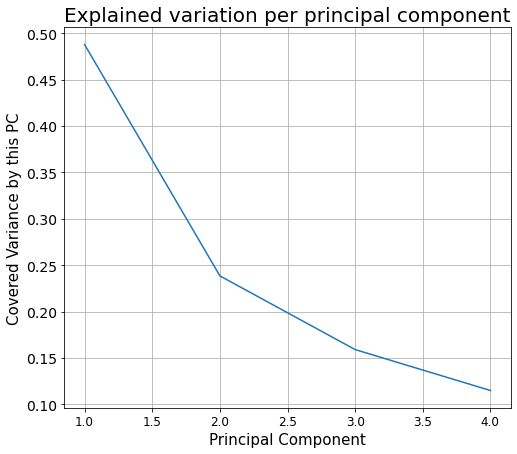

Explained variation: [0.48770064 0.23842376 0.15898696 0.11488864]

Covered Cumulative Variance: %100.0


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas

data = pandas.read_csv('music_dataset3.csv',index_col=False)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X, y).transform(X)

n_components = 4
xs = np.array(range(1,n_components+1))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, lda.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.grid()
plt.savefig('lda_variance')
plt.show()

print('Explained variation: {}'.format(lda.explained_variance_ratio_[0:n_components]))
print('\nCovered Cumulative Variance: %'+str(round(lda.explained_variance_ratio_[0:n_components].sum()*100,3)))


<Figure size 432x288 with 0 Axes>

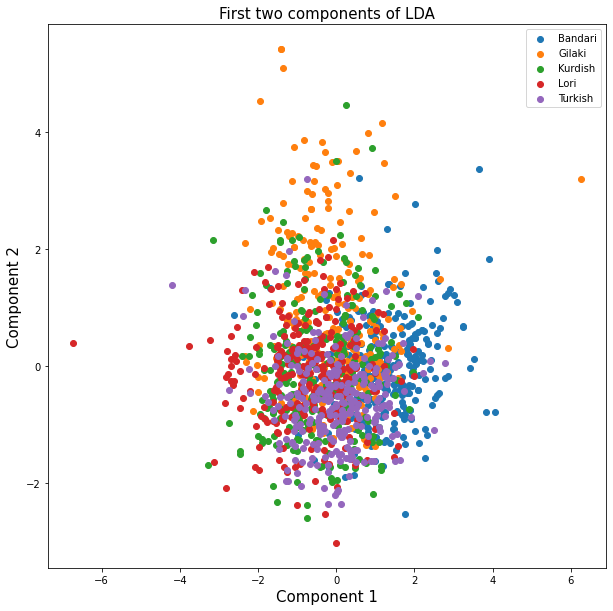

In [7]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

c_class = ["Bandari", "Gilaki", "Kurdish", "Lori", "Turkish"]

plt.figure()
plt.figure(figsize=(10,10))
for c in c_class:
    plt.scatter(X_lda[data.iloc[:,-1] == c, 0], X_lda[data.iloc[:,-1] == c, 1])
plt.xlabel("Component 1",fontsize=15)
plt.ylabel("Component 2",fontsize=15)
plt.title("First two components of LDA",fontsize=15)
plt.legend(c_class)
plt.savefig("LDA")
plt.show()    